### Notes

In [ ]:
# VaR estimates 
# 1- Historical (non-parametric) 
# 2- Variance-Covariance (parametric gaussian): VaR=Z⋅σ−μ (Z equivilant to 95% or whichever %)
# 3- parametric non-gaussian: this has a probem when the distribution is not fitting the data 
# 4- Cornish-Fisher (semi-parametric): Z alpha = Z for Gaussian + correction then VaR = -(mean+z_modified*std)
# Trade off between model risk and sample risk while choosing between parmetric and non-parametric

### Notebook Setup

In [25]:
import sys
import os
import pandas as pd
from scipy.stats import norm 
import numpy as np

# Add the project's root directory to sys.path
sys.path.append(os.path.abspath("../Modules"))

import risk_kit as rk
%load_ext autoreload 
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [3]:
hfi = rk.get_hfi_returns()
hfi.head()

c:\Users\OMAR\Desktop\Randa\Investment-Management-with-Python-and-ML\Modules\risk_kit.py:44: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/edhec-hedgefundindices.csv"


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### Semi-deviation

In [7]:
rk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### VaR and CVaR

In [ ]:
# Historic
# Parametric - Gaussian 
# Modified Cornish-Fisher VaR - it takes into consideration returns are not Gaussian 

#### Historic VaR

In [ ]:
# there is a 5% that in any given month, you will loose this % or more 

np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [23]:
rk.var_historic(hfi)

Those values are reported as +ve numbers but remmber they are risk values!


Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

#### Parametric VaR

In [29]:
## This could be used to calculate how many standard deviations from the mean this cut off (5%) is (using its z-core score)
## note: For a normal distribution what is the z-score that corresponds to 50% (it is where the mean is so the answer is 0)

z = norm.ppf(0.05)
z

np.float64(-1.6448536269514729)

In [33]:
# Value of risk at the 5% level

rk.var_gaussian(hfi, 5)

Those values are reported as +ve numbers but remmber they are risk values!


Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

#### Modified VaR (Cornish-Fisher)

In [61]:
rk.var_gaussian(hfi, 5, True)

Those values are reported as +ve numbers but remmber they are risk values!


Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

### VaR comparison

Those values are reported as +ve numbers but remmber they are risk values!
Those values are reported as +ve numbers but remmber they are risk values!
Those values are reported as +ve numbers but remmber they are risk values!


<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

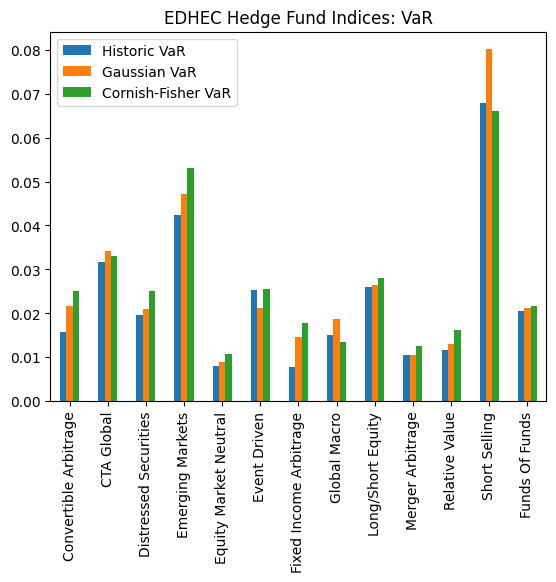

In [67]:
var_list = [rk.var_historic(hfi), rk.var_gaussian(hfi), rk.var_gaussian(hfi, modified=True)]
comparison=pd.concat(var_list, axis=1)
comparison.columns = ['Historic VaR', 'Gaussian VaR', 'Cornish-Fisher VaR']
comparison.plot.bar(title = 'EDHEC Hedge Fund Indices: VaR')

### Beyond VaR (conditional VaR)